# Startup-Acquisition-Status-Prediction.

### Preprocessing

In [1]:
#import necessary libraries  
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [2]:
# to display all columns
pd.set_option('display.max_columns', None)

In [3]:
company = pd.read_csv("D:\\technocalobs\\2nd project\\Data_companies\\companies.csv")

In [4]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [5]:
company.shape

(196553, 44)

##### A. Data Cleaning
1. Delete irrelevant & redundant information
2. Remove noise or unreliable data (missing values and outliers)

##### 1. Delete irrelevant and redundant information
 1. Delete 'region','city','state_code' as they provide too much of granularity.
 2. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.
 3. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
    'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
    'invested_companies' as they are irrelevant features.   
 4. Delete those which has more than 98% of null values.

In [6]:
company.drop(['region','city','state_code'], axis=1,inplace=True)
company.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], axis=1,inplace=True)
company.drop([ 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], axis=1,inplace=True)

In [7]:
# Since we can see only nan values so let's check how much of ros has nan values.
percent_missing = company. isnull(). sum() * 100 / len(company)
print("percentage of nan in each columns:")
percent_missing.sort_values()

percentage of nan in each columns:


status                  0.000000
relationships          34.029498
category_code          37.326828
milestones             53.346426
last_milestone_at      53.346426
first_milestone_at     53.346426
founded_at             53.586564
country_code           55.233448
lat                    57.338733
lng                    57.338733
funding_rounds         83.868473
last_funding_at        83.970227
first_funding_at       83.970227
funding_total_usd      85.818583
closed_at              98.667026
investment_rounds      98.681780
last_investment_at     98.685851
first_investment_at    98.685851
ROI                    99.630634
dtype: float64

In [8]:
# Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
company.drop(['first_investment_at','last_investment_at','investment_rounds','ROI'], axis=1,inplace=True)

In [9]:
company.shape

(196553, 15)

In [10]:
company.isna().sum()

category_code          73367
status                     0
founded_at            105326
closed_at             193933
country_code          108563
first_funding_at      165046
last_funding_at       165046
funding_rounds        164846
funding_total_usd     168679
first_milestone_at    104854
last_milestone_at     104854
milestones            104854
relationships          66886
lat                   112701
lng                   112701
dtype: int64

In [11]:
# Drop missing values
company.dropna(subset=['category_code', 'status', 'founded_at', 'country_code', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships','lat', 'lng'], inplace=True)

In [12]:
company.shape

(12327, 15)

##### Outliers

<Axes: xlabel='funding_total_usd'>

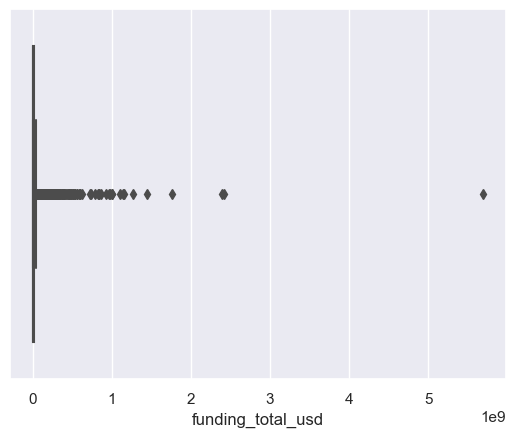

In [13]:
# 'funding_total_usd' 
sns.boxplot(x=company["funding_total_usd"])

In [14]:
# For funding_total_usd

Q1_FTU = company.funding_total_usd.quantile(0.25)
Q3_FTU = company.funding_total_usd.quantile(0.75)
Q1_FTU, Q3_FTU
IQR_FTU = Q3_FTU - Q1_FTU
print(f"IQR of funding_total_usd is: {IQR_FTU}\n")

# For funding_total_usd
lower_limit_FTU = Q1_FTU - 1.5*IQR_FTU
upper_limit_FTU = Q3_FTU + 1.5*IQR_FTU
print("funding_total_usd")
print(f"lower limit is: {lower_limit_FTU}")
print(f"upper limit is: {upper_limit_FTU}\n")

# For funding_total_usd
funding_total_usd_outliers=company[(company.funding_total_usd<lower_limit_FTU)|(company.funding_total_usd>upper_limit_FTU)]
print(f"Outliers{funding_total_usd_outliers.shape}")

# For funding_total_usd
company.drop(company[(company.funding_total_usd<lower_limit_FTU)|(company.funding_total_usd>upper_limit_FTU)].index,inplace=True)

IQR of funding_total_usd is: 15846000.0

funding_total_usd
lower limit is: -23115000.0
upper limit is: 40269000.0

Outliers(1423, 15)


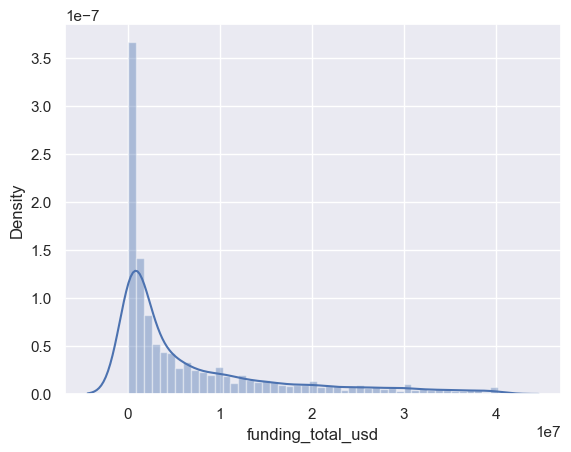

In [15]:
sns.distplot(company['funding_total_usd']) 
plt.show()

<Axes: xlabel='relationships'>

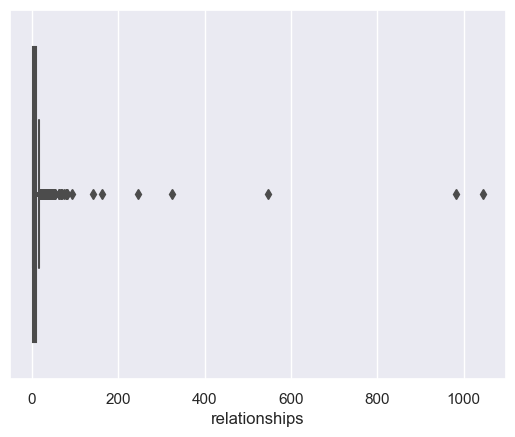

In [16]:
sns.boxplot(x=company["relationships"])

In [17]:
# For relationships 

Q1_rel = company.relationships.quantile(0.25)
Q3_rel = company.relationships.quantile(0.75)
Q1_rel, Q3_rel
IQR_rel = Q3_rel - Q1_rel
print(f"IQR of relationships is: {IQR_rel}\n")

# For relationships
lower_limit_rel = Q1_rel - 1.5*IQR_rel
upper_limit_rel = Q3_rel + 1.5*IQR_rel
print("relationships")
print(f"lower limit is: {lower_limit_rel}")
print(f"upper limit is: {upper_limit_rel}\n")

# For relationships
relationships_outliers=company[(company.relationships<lower_limit_rel)|(company.relationships>upper_limit_rel)]
print(f"Outliers{relationships_outliers.shape}")

# For relationships
company.drop(company[(company.relationships<lower_limit_rel)|(company.relationships>upper_limit_rel)].index,inplace=True)

IQR of relationships is: 6.0

relationships
lower limit is: -7.0
upper limit is: 17.0

Outliers(499, 15)


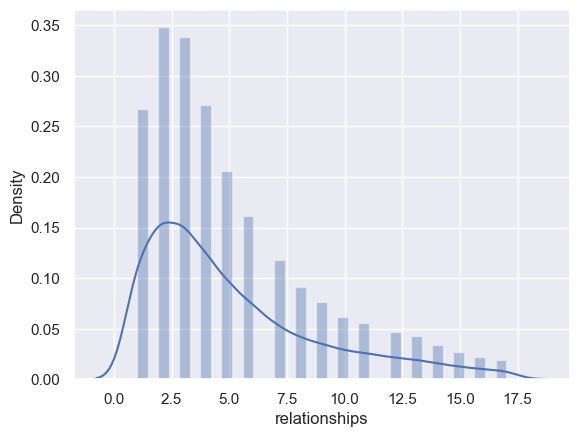

In [18]:
sns.distplot(company['relationships']) 
plt.show()

In [19]:
company.describe()

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,10405.000000,1.040500e+04,10405.000000,10405.000000,10405.000000,10405.000000
mean,1.831716,6.521776e+06,1.612206,5.123402,38.569066,-66.152293
std,1.139464,8.971708e+06,0.813090,3.764981,13.448626,63.010678
min,1.000000,2.910000e+02,1.000000,1.000000,-42.883611,-158.056896
25%,1.000000,5.000000e+05,1.000000,2.000000,37.338208,-121.886329
50%,1.000000,2.250000e+06,1.000000,4.000000,39.103118,-80.244216
75%,2.000000,9.115000e+06,2.000000,7.000000,43.653226,-3.703790
max,15.000000,4.026850e+07,9.000000,17.000000,70.919200,174.776236


In [20]:
# For founded_at
company['founded_at']=pd.to_datetime(company['founded_at'], format='%Y-%m-%d').dt.year

# closed_at
company['closed_at']=pd.to_datetime(company['closed_at'], format='%Y-%m-%d').dt.year

# first_funding_at
company['first_funding_at']=pd.to_datetime(company['first_funding_at'], format='%Y-%m-%d').dt.year

# last_funding_at
company['last_funding_at']=pd.to_datetime(company['last_funding_at'], format='%Y-%m-%d').dt.year

# first_milestone_at
company['first_milestone_at']=pd.to_datetime(company['first_milestone_at'], format='%Y-%m-%d').dt.year


# last_milestone_at
company['last_milestone_at']=pd.to_datetime(company['last_milestone_at'], format='%Y-%m-%d').dt.year

company.dtypes

category_code          object
status                 object
founded_at              int32
closed_at             float64
country_code           object
first_funding_at        int32
last_funding_at         int32
funding_rounds        float64
funding_total_usd     float64
first_milestone_at      int32
last_milestone_at       int32
milestones            float64
relationships         float64
lat                   float64
lng                   float64
dtype: object

In [21]:
# 1. category_code
print('Total number of unique categories are:',company.category_code.nunique())
company.category_code.unique()


Total number of unique categories are: 42


array(['web', 'cleantech', 'mobile', 'enterprise', 'games_video',
       'analytics', 'news', 'software', 'other', 'security',
       'advertising', 'photo_video', 'finance', 'travel', 'ecommerce',
       'transportation', 'hospitality', 'public_relations', 'biotech',
       'health', 'education', 'medical', 'network_hosting', 'nonprofit',
       'search', 'sports', 'fashion', 'messaging', 'consulting', 'music',
       'social', 'hardware', 'real_estate', 'automotive', 'pets',
       'manufacturing', 'semiconductor', 'legal', 'design', 'local',
       'nanotech', 'government'], dtype=object)

In [22]:
company.category_code.value_counts()

category_code
software            1735
web                 1204
mobile               973
enterprise           798
ecommerce            656
advertising          578
games_video          525
biotech              348
analytics            341
social               302
hardware             237
education            219
finance              199
cleantech            174
security             157
other                155
network_hosting      153
health               148
search               137
public_relations     131
messaging            114
travel               113
medical              104
fashion               92
consulting            92
semiconductor         91
news                  85
music                 84
hospitality           80
photo_video           65
real_estate           61
sports                51
manufacturing         48
nonprofit             33
automotive            29
transportation        24
design                22
legal                 21
pets                  10
nanotech   

In [23]:
# category_encoading
category_others_index = company.category_code.value_counts()[14:].index
company['category_code'] = company['category_code'].replace(to_replace=category_others_index,value='other')

In [24]:
# Let's check if we've more than 15 columns
print('Unique no of category_code : ',company['category_code'].nunique())
company.category_code.value_counts()

Unique no of category_code :  15


category_code
other          2116
software       1735
web            1204
mobile          973
enterprise      798
ecommerce       656
advertising     578
games_video     525
biotech         348
analytics       341
social          302
hardware        237
education       219
finance         199
cleantech       174
Name: count, dtype: int64

In [25]:
print('Total number of unique categories are:',company.country_code.nunique())
company.country_code.unique()

Total number of unique categories are: 91


array(['USA', 'AUS', 'SWE', 'DEU', 'JPN', 'GBR', 'RUS', 'ISL', 'CAN',
       'CHE', 'ISR', 'TUR', 'FRA', 'ZAF', 'MYS', 'ESP', 'IND', 'KOR',
       'DNK', 'IRL', 'CHN', 'EST', 'PHL', 'BEL', 'PRT', 'SGP', 'NLD',
       'UKR', 'MEX', 'IDN', 'POL', 'SVK', 'EGY', 'NZL', 'NGA', 'CZE',
       'FIN', 'HRV', 'ITA', 'HUN', 'HKG', 'CYP', 'GRC', 'NPL', 'ARG',
       'BRA', 'BGR', 'CHL', 'LUX', 'ARE', 'THA', 'AUT', 'BHS', 'GEO',
       'NOR', 'PAN', 'LBN', 'BGD', 'URY', 'GTM', 'LTU', 'COL', 'TWN',
       'ANT', 'MAR', 'CRI', 'BLR', 'SVN', 'VEN', 'VNM', 'ALB', 'LVA',
       'JOR', 'PER', 'DOM', 'KEN', 'UGA', 'MMR', 'ROM', 'BHR', 'AZE',
       'PAK', 'CYM', 'UMI', 'GIB', 'CMR', 'SAU', 'GHA', 'CSS', 'FST',
       'BRB'], dtype=object)

In [26]:
country_code_others_index = company['country_code'].value_counts()[9:].index
company['country_code'] = company['country_code'].replace(to_replace=country_code_others_index,value='other')

In [27]:
print('Total number of unique countries are:',company.country_code.nunique())
company.country_code.unique()

Total number of unique countries are: 10


array(['USA', 'AUS', 'other', 'DEU', 'GBR', 'CAN', 'ISR', 'FRA', 'ESP',
       'IND'], dtype=object)

##### Create new variables¶
1. Create new feature isClosed from closed_at and status.
2. Create new feature 'active_days'

##### 1. Create new feature isClosed from closed_at and status.
 - if the value in status is 'operating' or 'ipo', Let's put 0.
 - Where as if the value is 'acquired' or 'closed', let's put 1.

In [28]:
def isClosed(row):
    if row['status'] == 'operating' or row['status'] == 'ipo':
        return 0
    else:
        return 1
company['isClosed'] = company.apply(lambda rw: isClosed(rw),axis=1)
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed
0,web,operating,2005,NaN,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0
13,web,acquired,2007,NaN,USA,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,1
20,cleantech,operating,2003,NaN,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0
26,mobile,operating,2003,NaN,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0
45,enterprise,operating,2004,NaN,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,mobile,closed,2008,2012.0,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1
196537,social,operating,2011,NaN,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0
196540,games_video,closed,2006,2012.0,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1
196549,other,operating,2007,NaN,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0


#####  Replacing the values in closed_at column
if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.

Where as if the value is 'acquired' or 'closed', let's put 0.

In [29]:
company['closed_at']=(np.where((company['status']=='operating')|(company['status']=='ipo'),2021,company['closed_at']))

In [30]:
company = company.dropna()

In [31]:
company.shape

(9324, 16)

In [32]:
company.duplicated().sum()

3

In [33]:
# Let's delete all the duplicate values
company.drop_duplicates(inplace=True)

In [34]:
company.isClosed.value_counts()

isClosed
0    8722
1     599
Name: count, dtype: int64

##### 2. Create active_days column from founded_at and closed_at column

Active days = founded_at - closed_at

In [35]:
company['active_days'] = 365*(company.closed_at - company.founded_at)

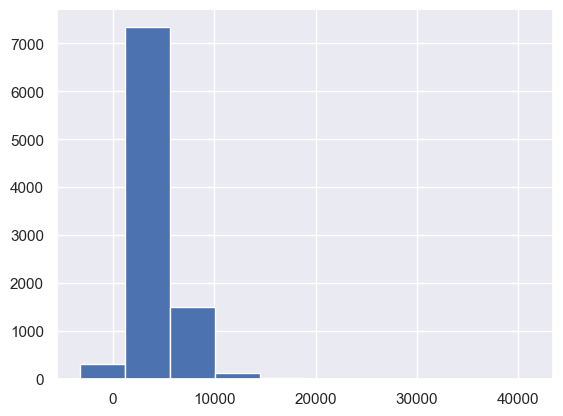

In [36]:
plt.hist(company['active_days'], bins=10)
plt.show()

In [37]:
print(company.columns)


Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'isClosed', 'active_days'],
      dtype='object')


In [38]:
company.to_csv('final_company', index=False)

### EDA

In [39]:
company.describe()

,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
count,9321.000000,9321.000000,9321.000000,9321.000000,9321.000000,9.321000e+03,9321.000000,9321.000000,9321.000000,9321.000000,9321.000000,9321.000000,9321.000000,9321.000000
mean,2007.967707,2020.400279,2010.369596,2011.314666,1.821693,6.118446e+06,2010.393949,2011.068018,1.564639,4.986804,38.451869,-63.883144,0.064263,4537.888639
std,5.474789,2.317260,2.365156,2.029823,1.147850,8.782050e+06,2.911082,2.725316,0.774133,3.709942,13.927531,64.110249,0.245235,2141.460773
min,1908.000000,2000.000000,1994.000000,1994.000000,1.000000,2.910000e+02,1976.000000,1976.000000,1.000000,1.000000,-42.883611,-158.056896,0.000000,-3285.000000
25%,2007.000000,2021.000000,2009.000000,2011.000000,1.000000,4.055290e+05,2010.000000,2010.000000,1.000000,2.000000,37.229573,-120.740139,0.000000,3650.000000
50%,2010.000000,2021.000000,2011.000000,2012.000000,1.000000,2.000000e+06,2011.000000,2012.000000,1.000000,4.000000,39.569600,-79.931051,0.000000,4015.000000
75%,2011.000000,2021.000000,2012.000000,2013.000000,2.000000,8.100000e+06,2012.000000,2013.000000,2.000000,7.000000,43.653226,-1.404351,0.000000,5110.000000
max,2014.000000,2021.000000,2013.000000,2013.000000,15.000000,4.026850e+07,2014.000000,2014.000000,9.000000,17.000000,70.919200,174.776236,1.000000,41245.000000


isClosed
0    8722
1     599
Name: count, dtype: int64


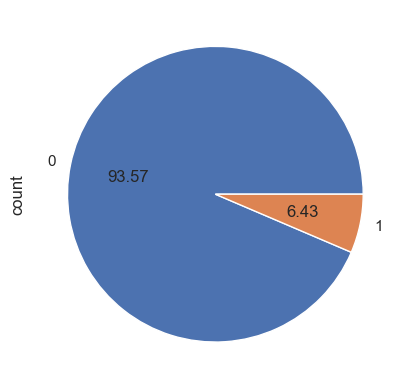

In [40]:
print(company.isClosed.value_counts())
company['isClosed'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

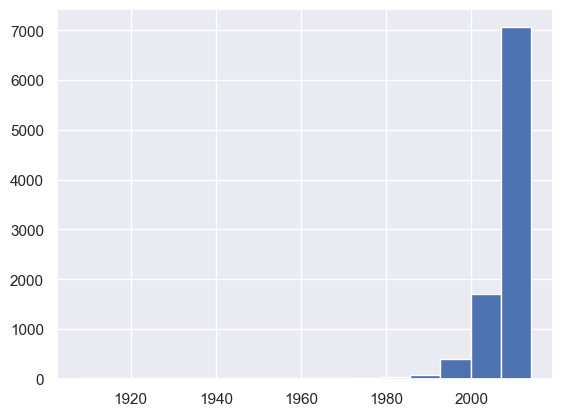

In [41]:
plt.hist(company['founded_at'], bins=15)
plt.show()

In [42]:
print(company.columns)

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'isClosed', 'active_days'],
      dtype='object')


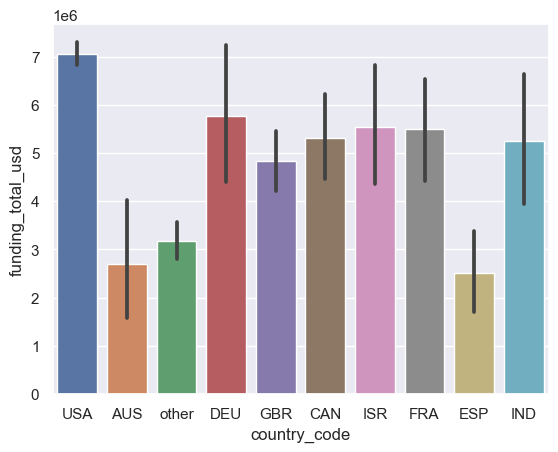

In [43]:
sns.barplot(x=company['country_code'], y=company['funding_total_usd'])
plt.show()

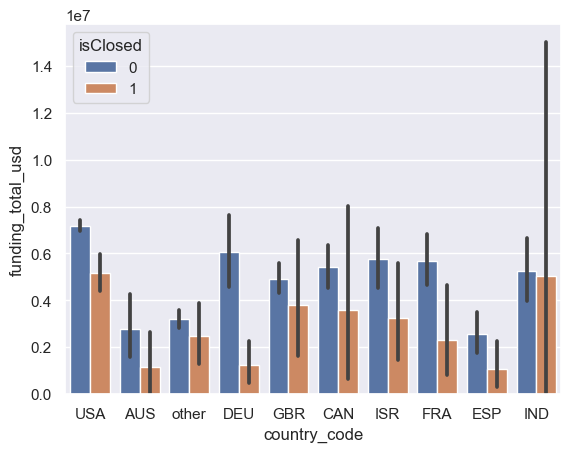

In [44]:
sns.barplot(x='country_code', y='funding_total_usd', hue='isClosed', data=company)
plt.show()

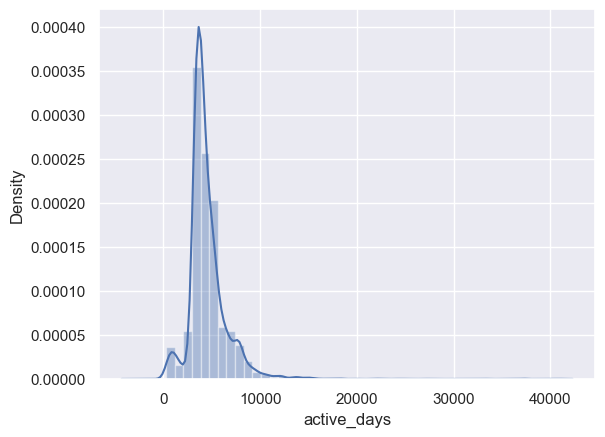

In [45]:
sns.distplot(company['active_days']) 
plt.show()

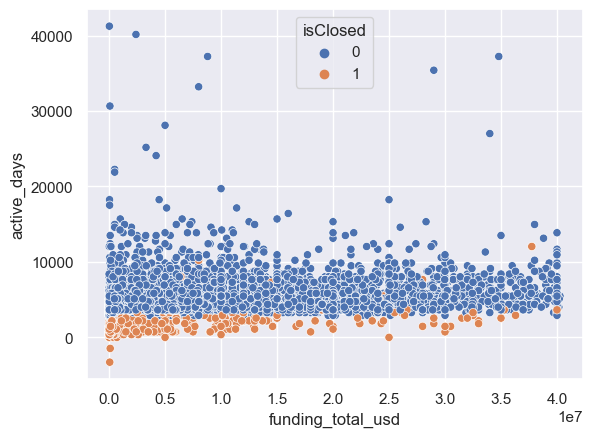

In [46]:
sns.scatterplot(x='funding_total_usd', y='active_days', hue='isClosed', data=company)
plt.show()

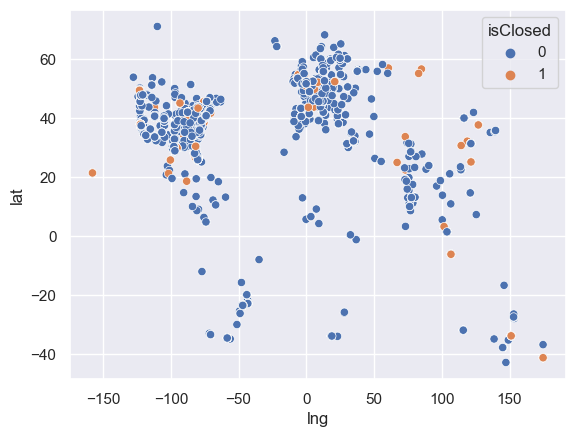

In [47]:
sns.scatterplot(x='lng', y='lat', hue='isClosed', data=company)
plt.show()

In [48]:
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
0,web,operating,2005,2021.0,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0
20,cleantech,operating,2003,2021.0,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0
26,mobile,operating,2003,2021.0,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0
45,enterprise,operating,2004,2021.0,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0
48,web,operating,2006,2021.0,USA,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,mobile,closed,2008,2012.0,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0
196537,social,operating,2011,2021.0,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0
196540,games_video,closed,2006,2012.0,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0
196549,other,operating,2007,2021.0,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0


# ---------------------------------------------------------------------------------------------------------------

In [49]:
#import necessary libraries

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [50]:
company = pd.read_csv('final_company')

In [51]:
company.sample(50)

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
4381,other,operating,2013,2021.0,IND,2013,2013,1.0,100000.0,2013,2013,1.0,1.0,28.535516,77.391026,0,2920.0
2647,software,operating,2012,2021.0,USA,2012,2012,1.0,50000.0,2012,2012,1.0,4.0,37.386052,-122.083851,0,3285.0
1830,mobile,operating,2011,2021.0,USA,2012,2013,3.0,5500000.0,2012,2013,2.0,3.0,37.562992,-122.325525,0,3650.0
8139,web,closed,2010,2012.0,USA,2011,2011,1.0,690000.0,2011,2011,1.0,4.0,39.103118,-84.512020,1,730.0
8841,enterprise,operating,2010,2021.0,USA,2012,2013,2.0,10575000.0,2013,2013,2.0,4.0,47.751074,-120.740139,0,4015.0
9190,social,closed,2009,2013.0,USA,2010,2011,2.0,325000.0,2011,2011,1.0,5.0,40.712775,-74.005973,1,1460.0
2843,other,operating,2011,2021.0,USA,2013,2013,1.0,525000.0,2012,2012,1.0,4.0,41.823989,-71.412834,0,3650.0
8769,mobile,operating,2011,2021.0,USA,2011,2011,1.0,15000.0,2011,2011,1.0,6.0,40.712775,-74.005973,0,3650.0
4749,software,operating,2012,2021.0,USA,2012,2013,2.0,1070000.0,2012,2012,1.0,2.0,37.338208,-121.886329,0,3285.0
5089,enterprise,operating,2005,2021.0,USA,2005,2008,3.0,31000000.0,2010,2010,2.0,14.0,34.075376,-84.294090,0,5840.0


##### Corelation and Multicolinarity

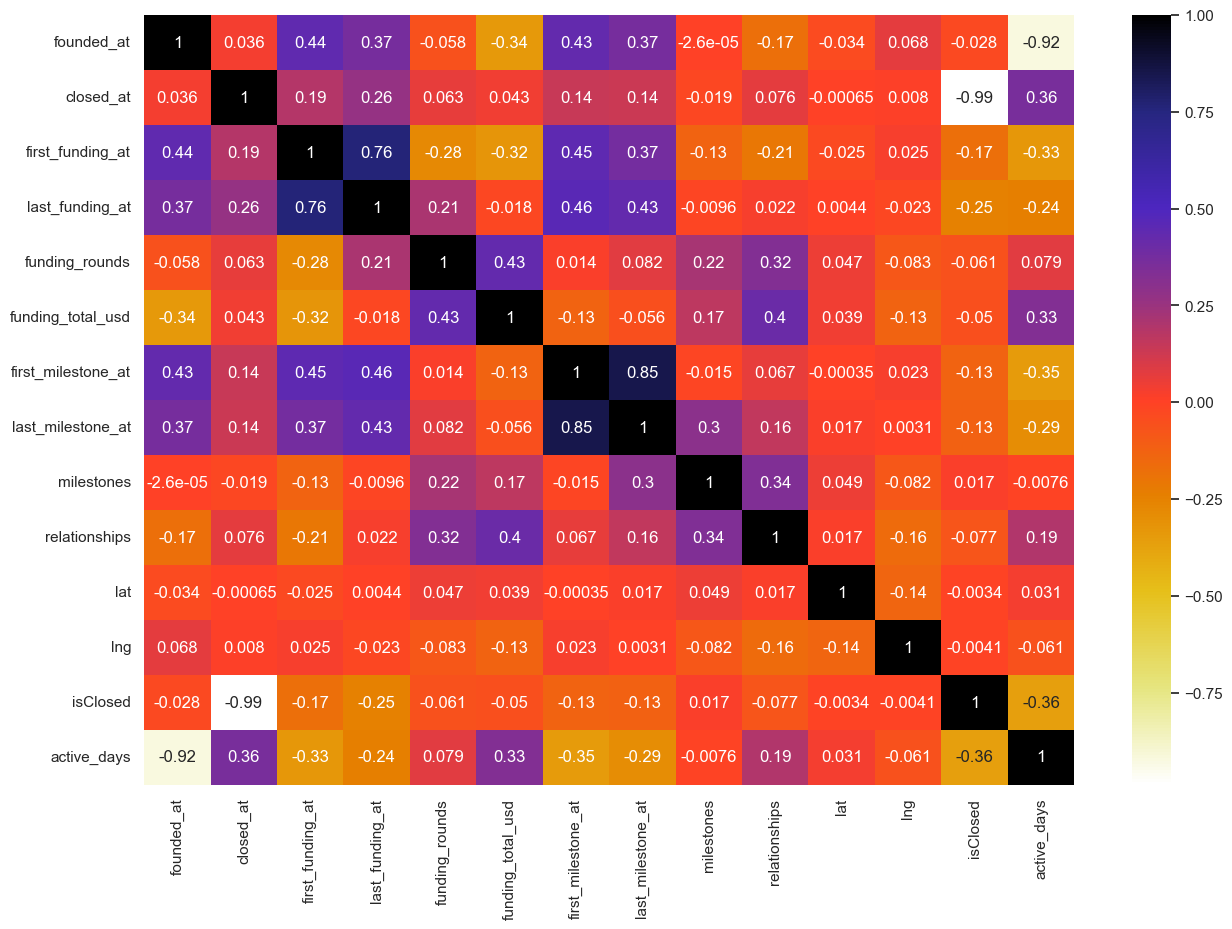

In [52]:
#Using Pearson Correlation
numerical_columns = company.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15,10))
cor = numerical_columns.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [53]:
cor["isClosed"].sort_values(ascending=False)

isClosed              1.000000
milestones            0.016832
lat                  -0.003354
lng                  -0.004084
founded_at           -0.028183
funding_total_usd    -0.050217
funding_rounds       -0.061061
relationships        -0.077139
last_milestone_at    -0.125180
first_milestone_at   -0.130754
first_funding_at     -0.174515
last_funding_at      -0.246476
active_days          -0.363778
closed_at            -0.987626
Name: isClosed, dtype: float64

In [54]:
# Import library for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [55]:
vif_df = company.drop(["isClosed",'category_code','country_code'], axis=1)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

def calc_vif(df):
    # Exclude non-numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Check for missing values
    if numeric_df.isnull().values.any():
        raise ValueError("DataFrame contains missing values (NaNs)")
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
    return vif_data

# Call the calc_vif function with your DataFrame
vif_results = calc_vif(vif_df)
print(vif_results)

               feature           VIF
0           founded_at           inf
1            closed_at           inf
2     first_funding_at  3.693328e+06
3      last_funding_at  4.365378e+06
4       funding_rounds  7.375689e+00
5    funding_total_usd  2.298635e+00
6   first_milestone_at  2.479594e+06
7    last_milestone_at  2.847642e+06
8           milestones  8.597062e+00
9        relationships  4.000309e+00
10                 lat  8.827071e+00
11                 lng  2.107149e+00
12         active_days           inf


In [57]:
X = company.drop(["isClosed",'category_code','country_code','last_milestone_at','first_funding_at','founded_at','last_funding_at','first_milestone_at'], axis=1)

In [58]:
calc_vif(X)

,feature,VIF
0,closed_at,18.243834
1,funding_rounds,4.565358
2,funding_total_usd,2.214626
3,milestones,5.881283
4,relationships,3.842497
5,lat,8.819970
6,lng,2.096726
7,active_days,6.309750


In [59]:
# company = company.drop(['first_funding_at', 'last_milestone_at', 'founded_at','last_funding_at','first_milestone_at'], axis=1)

##### one hot encoading

In [60]:
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
0,web,operating,2005,2021.0,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0
1,cleantech,operating,2003,2021.0,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0
2,mobile,operating,2003,2021.0,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0
3,enterprise,operating,2004,2021.0,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0
4,web,operating,2006,2021.0,USA,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,mobile,closed,2008,2012.0,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0
9317,social,operating,2011,2021.0,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0
9318,games_video,closed,2006,2012.0,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0
9319,other,operating,2007,2021.0,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0


In [61]:
# One-hot encoding to category_code
dummies = pd.get_dummies(company.category_code, prefix='category', drop_first=True)
dummies

,category_analytics,category_biotech,category_cleantech,category_ecommerce,category_education,category_enterprise,category_finance,category_games_video,category_hardware,category_mobile,category_other,category_social,category_software,category_web
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9317,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9318,False,False,False,False,False,False,False,True,False,False,False,False,False,False
9319,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [62]:
# Concatenate category with company dataset
company = pd.concat([company,dummies],axis='columns')
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days,category_analytics,category_biotech,category_cleantech,category_ecommerce,category_education,category_enterprise,category_finance,category_games_video,category_hardware,category_mobile,category_other,category_social,category_software,category_web
0,web,operating,2005,2021.0,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,cleantech,operating,2003,2021.0,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,mobile,operating,2003,2021.0,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,enterprise,operating,2004,2021.0,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,web,operating,2006,2021.0,USA,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,mobile,closed,2008,2012.0,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9317,social,operating,2011,2021.0,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9318,games_video,closed,2006,2012.0,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False
9319,other,operating,2007,2021.0,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [63]:
# Since, We've added the encoded country_code , let's delete original category_code
company.drop(['category_code'], axis=1,inplace=True)

In [64]:
# One-hot encoding to category_code
dummies = pd.get_dummies(company.country_code, prefix='country', drop_first=True)
dummies

,country_CAN,country_DEU,country_ESP,country_FRA,country_GBR,country_IND,country_ISR,country_USA,country_other
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
9316,False,False,False,False,False,False,False,True,False
9317,True,False,False,False,False,False,False,False,False
9318,False,False,False,False,False,False,False,True,False
9319,False,False,False,False,False,False,False,True,False


In [65]:
# Concatenate category with company dataset
company = pd.concat([company,dummies],axis='columns')
company

,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days,category_analytics,category_biotech,category_cleantech,category_ecommerce,category_education,category_enterprise,category_finance,category_games_video,category_hardware,category_mobile,category_other,category_social,category_software,category_web,country_CAN,country_DEU,country_ESP,country_FRA,country_GBR,country_IND,country_ISR,country_USA,country_other
0,operating,2005,2021.0,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1,operating,2003,2021.0,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,operating,2003,2021.0,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,operating,2004,2021.0,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,operating,2006,2021.0,USA,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,closed,2008,2012.0,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
9317,operating,2011,2021.0,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
9318,closed,2006,2012.0,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
9319,operating,2007,2021.0,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [66]:
# Since, We've added the encoded country_code , let's delete original category_code
company.drop(['country_code'], axis=1,inplace=True)

In [67]:
company

,status,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days,category_analytics,category_biotech,category_cleantech,category_ecommerce,category_education,category_enterprise,category_finance,category_games_video,category_hardware,category_mobile,category_other,category_social,category_software,category_web,country_CAN,country_DEU,country_ESP,country_FRA,country_GBR,country_IND,country_ISR,country_USA,country_other
0,operating,2005,2021.0,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1,operating,2003,2021.0,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,operating,2003,2021.0,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,operating,2004,2021.0,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,operating,2006,2021.0,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,closed,2008,2012.0,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
9317,operating,2011,2021.0,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
9318,closed,2006,2012.0,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
9319,operating,2007,2021.0,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [68]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True, 
                                                    test_size=0.2)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts()[0]/y_train.value_counts()[1])
print(y_test.value_counts()[0]/y_test.value_counts()[1])

(7456, 37)
(1865, 37)
14.565762004175365
14.541666666666666


##### Oversampling 

In [71]:
print(X_train.shape)
print(y_test.shape)

(7456, 37)
(1865,)


In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts()[0]/y_train.value_counts()[1])
print(y_test.value_counts()[0]/y_test.value_counts()[1])

(7456, 37)
(1865, 37)
14.565762004175365
14.541666666666666


In [73]:
y_train.value_counts()

isClosed
0    6977
1     479
Name: count, dtype: int64

### Model Building
1. XG Boost
2. Random Forest
3. Logistic Regression
4. SVM

#### Random Forest

In [78]:
#testing on training set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_clf_predict = rf_clf.predict(X_train)
print(confusion_matrix(y_train,rf_clf_predict))
print(accuracy_score(y_train,rf_clf_predict))
print(classification_report(y_train,rf_clf_predict))

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [79]:
#testing on tesing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_clf_predict = rf_clf.predict(X_test)
print(confusion_matrix(y_test,rf_clf_predict))
print(accuracy_score(y_test,rf_clf_predict))
print(classification_report(y_test,rf_clf_predict))

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

#### LogisticRegression

In [80]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'operating'

In [81]:
# testing on Traing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
log_reg_predict = log_reg.predict(X_train)
print(confusion_matrix(y_train,log_reg_predict))
print(accuracy_score(y_train,log_reg_predict))
print(classification_report(y_train,log_reg_predict))

ValueError: could not convert string to float: 'operating'

In [82]:
# predicting on test data set
log_reg_predict = log_reg.predict(X_test)
print(confusion_matrix(y_test, log_reg_predict))
print(accuracy_score(y_test, log_reg_predict))
print(classification_report(y_test, log_reg_predict))

ValueError: could not convert string to float: 'operating'

#### SVM

In [83]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

ValueError: could not convert string to float: 'operating'

In [ ]:
#testing on training set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_predict = svc.predict(X_train)
print(confusion_matrix(y_train,svc_predict))
print(accuracy_score(y_train,svc_predict))
print(classification_report(y_train,svc_predict))

In [84]:
#testing on tesing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_predict = svc.predict(X_test)
print(confusion_matrix(y_test,svc_predict))
print(accuracy_score(y_test,svc_predict))
print(classification_report(y_test,svc_predict))

ValueError: could not convert string to float: 'operating'

_______________________________________________________________________________________________________________________________

In [85]:


company = pd.read_csv('final_company')

In [86]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True, 
                                                    test_size=0.2)









##### one hot encoading and Scaling

In [88]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [89]:
ohe    = OneHotEncoder(sparse=False)
scaler = StandardScaler()

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [90]:
columns_to_encode = ['category_code', 'country_code']
columns_to_scale = ['founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'active_days']

In [91]:
scaled_columns  = scaler.fit_transform(X_train[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(X_train[columns_to_encode])

NameError: name 'scaler' is not defined

In [92]:
X_train = np.concatenate([scaled_columns, encoded_columns], axis=1)

NameError: name 'scaled_columns' is not defined

In [93]:
pd.DataFrame(X_train)

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,active_days
7948,biotech,operating,1996,2021.0,DEU,2011,2013,4.0,32406631.0,1999,2011,2.0,3.0,49.329583,7.339843,9125.0
5856,other,operating,2002,2021.0,USA,2008,2012,5.0,27800000.0,2002,2002,1.0,1.0,33.748995,-84.387982,6935.0
5254,ecommerce,operating,2008,2021.0,USA,2009,2010,2.0,1645349.0,2011,2011,1.0,6.0,42.129224,-80.085059,4745.0
2174,advertising,operating,2008,2021.0,ESP,2009,2011,3.0,3564155.0,2009,2009,1.0,3.0,40.416775,-3.703790,4745.0
2136,software,operating,2009,2021.0,USA,2012,2013,2.0,17000000.0,2012,2012,1.0,2.0,42.579258,-71.437841,4380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,web,operating,2012,2021.0,USA,2012,2013,2.0,2800000.0,2013,2013,2.0,11.0,37.774929,-122.419415,3285.0
9098,games_video,operating,2005,2021.0,other,2005,2005,1.0,750000.0,2005,2005,1.0,1.0,-19.924502,-43.935238,5840.0
4655,other,operating,2011,2021.0,USA,2011,2011,1.0,6280000.0,2012,2012,1.0,3.0,36.421701,-116.422160,3650.0
6977,hardware,operating,2007,2021.0,USA,2007,2007,2.0,110000.0,2010,2010,1.0,3.0,39.536482,-104.897068,5110.0


In [94]:
scaled_columns  = scaler.transform(X_test[columns_to_scale]) 
encoded_columns =    ohe.transform(X_test[columns_to_encode])

NameError: name 'scaler' is not defined

In [95]:
X_test = np.concatenate([scaled_columns, encoded_columns], axis=1)

NameError: name 'scaled_columns' is not defined

##### Handling Imbalanced Dataset

In [96]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'biotech'

#### LogisticRegression

In [97]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'biotech'

In [98]:


# testing on Traing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
log_reg_predict = log_reg.predict(X_train)
print(confusion_matrix(y_train,log_reg_predict))
print(accuracy_score(y_train,log_reg_predict))
print(classification_report(y_train,log_reg_predict))

ValueError: could not convert string to float: 'biotech'

In [99]:
# predicting on test data set
log_reg_predict = log_reg.predict(X_test)
print(confusion_matrix(y_test, log_reg_predict))
print(accuracy_score(y_test, log_reg_predict))
print(classification_report(y_test, log_reg_predict))

ValueError: could not convert string to float: 'web'

#### Support Vector Classification

In [100]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

ValueError: could not convert string to float: 'biotech'

In [101]:
#testing on training set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_predict = svc.predict(X_train)
print(confusion_matrix(y_train,svc_predict))
print(accuracy_score(y_train,svc_predict))
print(classification_report(y_train,svc_predict))

ValueError: could not convert string to float: 'biotech'

In [102]:
#testing on tesing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_predict = svc.predict(X_test)
print(confusion_matrix(y_test,svc_predict))
print(accuracy_score(y_test,svc_predict))
print(classification_report(y_test,svc_predict))

ValueError: could not convert string to float: 'web'

## ---------------------------------------------------------------------------------------------------------------------------------

#### Lets create Pipeline

pipe1 - without scaling data

pipe2 - with scaling data

In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [104]:
pd.set_option('display.max_columns', None)

In [105]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [106]:
company = pd.read_csv('final_company')

In [107]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True, 
                                                    test_size=0.2)

In [109]:
X_train

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,active_days
4080,analytics,operating,2003,2021.0,USA,2005,2012,7.0,15966943.0,2010,2011,2.0,7.0,42.360082,-71.058880,6570.0
952,web,operating,2011,2021.0,other,2011,2011,1.0,748678.0,2011,2011,1.0,1.0,48.208174,16.373819,3650.0
953,mobile,operating,2012,2021.0,GBR,2010,2010,1.0,1580000.0,2011,2011,2.0,2.0,51.507351,-0.127758,3285.0
2331,web,operating,2013,2021.0,DEU,2013,2013,1.0,3220000.0,2013,2013,3.0,1.0,52.520007,13.404954,2920.0
4423,software,operating,2012,2021.0,USA,2010,2013,3.0,1534997.0,2013,2013,1.0,5.0,42.360082,-71.058880,3285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,other,operating,2012,2021.0,other,2012,2012,1.0,50000.0,2012,2012,1.0,3.0,22.396428,114.109497,3285.0
3231,enterprise,operating,2012,2021.0,USA,2012,2012,1.0,200000.0,2012,2012,1.0,1.0,36.977173,-121.899402,3285.0
414,other,operating,2011,2021.0,USA,2011,2013,3.0,1570000.0,2013,2013,1.0,5.0,47.606209,-122.332071,3650.0
4416,ecommerce,operating,2009,2021.0,USA,2011,2012,2.0,7875598.0,2009,2009,1.0,4.0,26.127586,-80.233104,4380.0


In [110]:
# one hot encoding
trf1 = ColumnTransformer([
    ('ohe_category',OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'),[0]),
    ('ohe_country',OneHotEncoder(sparse=False,handle_unknown='ignore', drop='first'),[2])
],remainder='passthrough')

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [111]:
trf1

NameError: name 'trf1' is not defined

In [112]:
first_step = trf1.fit_transform(X_train)

NameError: name 'trf1' is not defined

In [113]:
pd.DataFrame(trf1.fit_transform(X_train)).head()

NameError: name 'trf1' is not defined

In [114]:
trf3 = xgb.XGBClassifier()

In [115]:
trf4= RandomForestClassifier()

In [116]:
trf5 = LogisticRegression()

In [117]:
trf6 = SVC()

In [118]:
from imblearn.pipeline import Pipeline
pipe1 = Pipeline([
    ('OHE',trf1),
    ('smote', SMOTE(random_state=11)),
#     ('XG BOOST',trf3)
#     ('Random Forest', trf4)
#     ('Logistic Regression', trf5)
    ('SVM', trf6)
])

NameError: name 'trf1' is not defined

In [119]:
pipe1.fit(X_train, y_train)

NameError: name 'pipe1' is not defined

In [120]:
y_pred = pipe1.predict(X_train)

NameError: name 'pipe1' is not defined

In [121]:





from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

NameError: name 'y_pred' is not defined

In [122]:
y_pred = pipe1.predict(X_test)

NameError: name 'pipe1' is not defined

In [123]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

NameError: name 'y_pred' is not defined

#### pipe2

In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [125]:
company = pd.read_csv('final_company')

In [126]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True, 
                                                    test_size=0.2)

In [128]:


# X_train = X_train.drop(['first_funding_at', 'last_milestone_at', 'founded_at','last_funding_at','first_milestone_at'], axis=1)

In [129]:
# X_test = X_test.drop(['first_funding_at', 'last_milestone_at', 'founded_at','last_funding_at','first_milestone_at'], axis=1)

In [130]:
# one hot encoding
trf1 = ColumnTransformer([
    ('ohe_category',OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'),[0]),
    ('ohe_country',OneHotEncoder(sparse=False,handle_unknown='ignore', drop='first'),[2])
],remainder='passthrough')

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [131]:
trf1

NameError: name 'trf1' is not defined

In [132]:
first_step = trf1.fit_transform(X_train)

NameError: name 'trf1' is not defined

In [133]:
pd.DataFrame(trf1.fit_transform(X_train)).head()

NameError: name 'trf1' is not defined

In [134]:

# Scaling
trf2 = ColumnTransformer([
    ('scale',StandardScaler(),slice(23,35))
],remainder='passthrough')

In [135]:
trf2

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 slice(23, 35, None))])

In [136]:
second_step = trf2.fit_transform(first_step)

NameError: name 'first_step' is not defined

In [137]:
pd.DataFrame(trf2.fit_transform(first_step)).head()

NameError: name 'first_step' is not defined

In [138]:
from imblearn.pipeline import Pipeline
pipe2 = Pipeline([
    ('OHE',trf1),
    ('smote', SMOTE(random_state=11)),
    ('scaling', trf2),
    ('Logistic Regression',trf5),
#     ('SVM',trf6)
])

NameError: name 'trf1' is not defined

In [139]:
pipe2.fit(X_train, y_train)

NameError: name 'pipe2' is not defined

In [140]:
y_pred = pipe2.predict(X_train)

NameError: name 'pipe2' is not defined

In [141]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

NameError: name 'y_pred' is not defined

In [142]:
y_pred = pipe2.predict(X_test)

NameError: name 'pipe2' is not defined

In [143]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

NameError: name 'y_pred' is not defined

#### ......................................................................................Thank You................................................................................................................